In [0]:
#Instalamos geopandas
!pip install geopandas

In [0]:
#Instalamos mapclassify
!pip install mapclassify

In [0]:
#Librerías varias
import os
import datetime
import pandas as pd
from datetime import date
from google.colab import drive

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/COVID-19 Chile (Coronavirus)/Database (CSV)/csv') #Carpeta donde tenemos guardados los datasets (csv)

#Cargamos el primer dataset
El primer dataset contiene:
* Número total de contagiados con COVID-19 a la fecha
* Número de nuevos contagiados
* Número de recuperados a la fecha
* Número de fallecidos a la fecha


In [4]:
fq = pd.read_csv('Resumen_COVID-19_Chile_.csv')
fq

,recuperados a nivel nacional,Casos_fallecidos,Casos_totales_nuevos,Casos_totales_dia,Fecha
0,0,0,1,1,2020-03-03
1,0,0,3,2,2020-03-04
2,0,0,4,1,2020-03-05
3,0,0,5,1,2020-03-06
4,0,0,7,2,2020-03-07
...,...,...,...,...,...
80,25342,630,61857,4276,2020-05-22
81,26546,673,65393,3536,2020-05-23
82,28148,718,69102,3709,2020-05-24
83,29302,761,73997,4895,2020-05-25


#Análisis de los datos

Este primer grafico nos muestra los casos de personas que tienen el COVID-19 acumulados en tiempo.

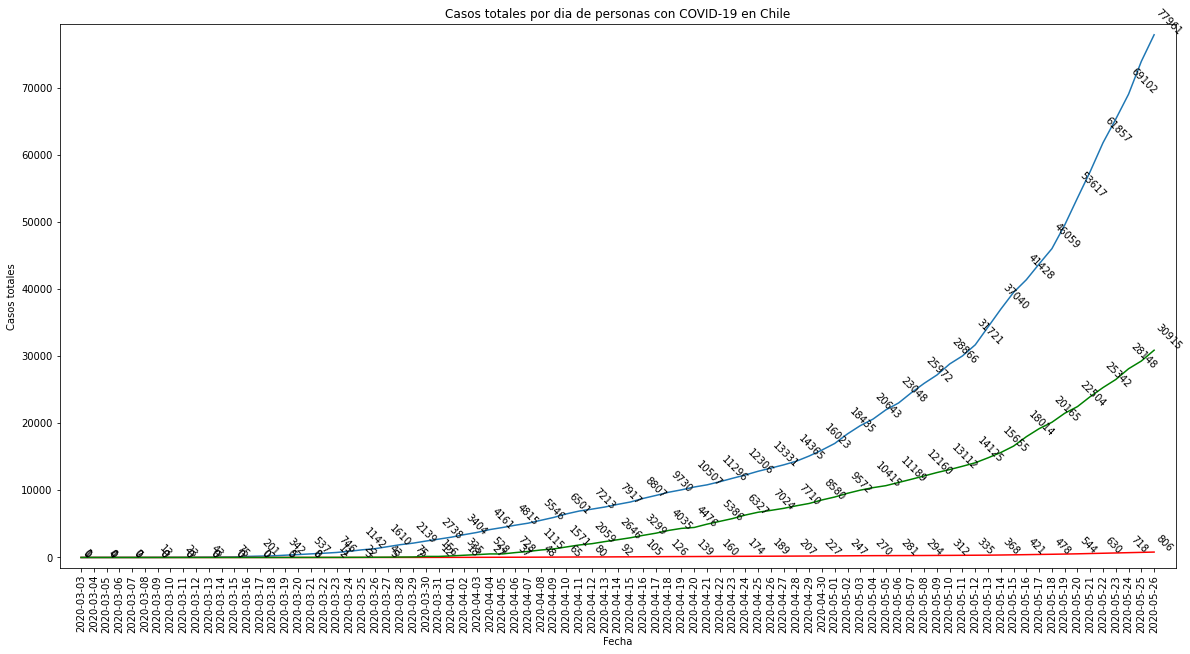

In [5]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(20,10)

plt.plot(fq['Fecha'],fq['Casos_totales_nuevos'],label='Casos totales por dia')
plt.plot(fq['Fecha'],fq['Casos_fallecidos'],label='fallecidos', color='red')
plt.plot(fq['Fecha'],fq['recuperados a nivel nacional'],label='recuperados', color='green')
plt.title("Casos totales por dia de personas con COVID-19 en Chile")
plt.xlabel("Fecha")
plt.ylabel("Casos totales")
mapeado = range(len(fq.Casos_totales_nuevos))
plt.xticks(mapeado,fq.Fecha,rotation='vertical')
plt.margins(0.02)

for i, v in enumerate(fq['Casos_totales_nuevos']):
  if i%2==0:    
    plt.annotate(v, xy=(i, v),ha='left',rotation=-45)
for i, v in enumerate(fq['Casos_fallecidos']):
  if i%2==0:
    plt.annotate(v, xy=(i, v),rotation=-45)
for i, v in enumerate(fq['recuperados a nivel nacional']):
  if i%2==0:
    plt.annotate(v, xy=(i, v),rotation=-45)
  
plt.show()

Hacemos los cálculos de casos recuperados y fallecidos diarios antes de hacer el grafico.

In [0]:
#Calculamos los casos diarios de recuperados
C_recuperado_dia = []
count = 0
for i in fq['recuperados a nivel nacional']:
  if i == 0:
    C_recuperado_dia.append(0)
    count+=1
  else:
    C_recuperado_dia.append(int(i - fq.iloc[count-1:count,:1].values))
    count+=1
#print(C_recuperado_dia)

#Calculamos los casos de fallecidos diarios
C_fellecidos_dia = []
count = 0
for k in fq['Casos_fallecidos']:
  if k == 0:
    C_fellecidos_dia.append(0)
    count+=1
  else:
    C_fellecidos_dia.append(int(k - fq.iloc[count-1:count,1:2].values))
    count+=1
#print(C_fellecidos_dia)

Este grafico muestra casos nuevos de personas infectadas, los recuperados y fallecidos por día.

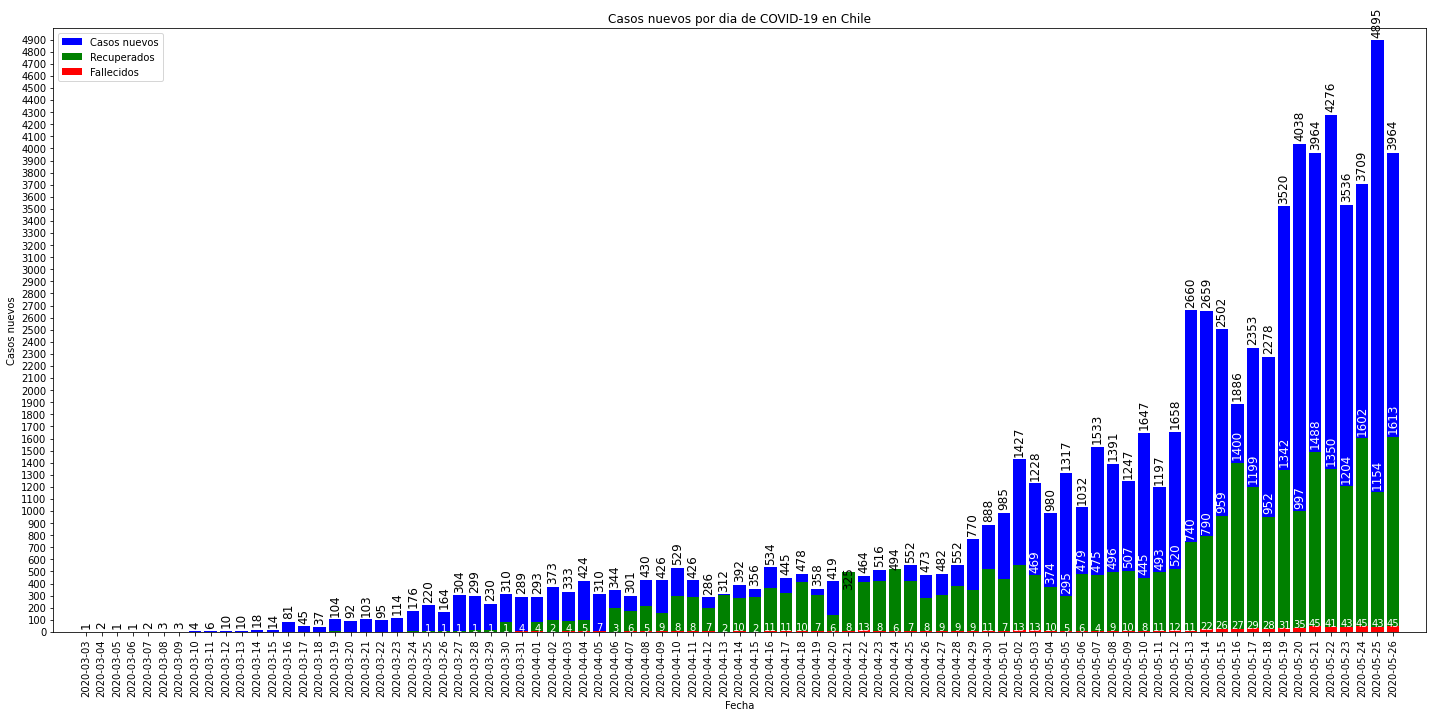

In [7]:
import numpy as np

fech = fq['Fecha']
plt.bar(fech,fq.Casos_totales_dia,color='blue',label = 'Casos nuevos')
#plt.bar(fech,fq['recuperados a nivel nacional'], color = 'green',label ='Recuperados')
plt.bar(fech,C_recuperado_dia, color = 'green',label ='Recuperados')
plt.bar(fech,C_fellecidos_dia, color = 'red',label = 'Fallecidos')


plt.title("Casos nuevos por dia de COVID-19 en Chile")
plt.xlabel("Fecha")
plt.ylabel("Casos nuevos")
mapeado2 = range(len(fq.Casos_totales_dia))
plt.xticks(mapeado2,fq.Fecha,rotation='vertical')
plt.yticks(np.arange(0,5000,step=100))
plt.legend(loc = 'upper left')
plt.tight_layout()
#plt.grid(True)
plt.margins(0.02)

for i, v in enumerate(fq.Casos_totales_dia):
  plt.annotate(v, xy=(i, v),xytext=(i, v+50),rotation=90,horizontalalignment='center',fontsize=12)
for i, v in enumerate(C_recuperado_dia):
  if i > 60:
    plt.annotate(v, xy=(i, v),xytext=(i, v+50),rotation='vertical',color='white',horizontalalignment='center',fontsize=12)
for i, v in enumerate(C_fellecidos_dia):
  if i > 21:
    plt.annotate(v, xy=(i, v),horizontalalignment='center',fontsize=10,color='white')

plt.show()


#Cargamos el segundo dataset
El segundo dataset contiene:
* Número casos nuevos
* Número casos totales a la fecha
* Número de fallecidos

y todos estos ordenados por región




In [8]:
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/COVID-19 Chile (Coronavirus)/Database (CSV)/csv/Dataset diarios')
df = pd.read_csv('Casos_COVID-19_Chile_'+str(date.today())+'.csv')
df.style.background_gradient(cmap='Reds')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Región,Casos totales acumulados,Casos nuevos totales,Casos nuevos con síntomas,Casos nuevos sin síntomas*,Fallecidos,% Total
0,Arica y Parinacota,522,9,8,1,7,"0,67%"
1,Tarapacá,1737,107,97,10,8,"2,23%"
2,Antofagasta,2063,48,44,4,23,"2,65%"
3,Atacama,188,3,2,1,0,"0,24%"
4,Coquimbo,384,46,37,9,2,"0,49%"
5,Valparaíso,2455,150,133,17,57,"3,15%"
6,Metropolitana,62285,3355,3074,281,567,"79,89%"
7,O’Higgins,654,66,59,7,13,"0,84%"
8,Maule,1013,60,60,0,15,"1,30%"
9,Ñuble,1147,8,8,0,22,"1,47%"


#Análisis de los datos del segundo dataset
En este grafico se muestra los nuevos casos de COVID-19 del dia actual por region.


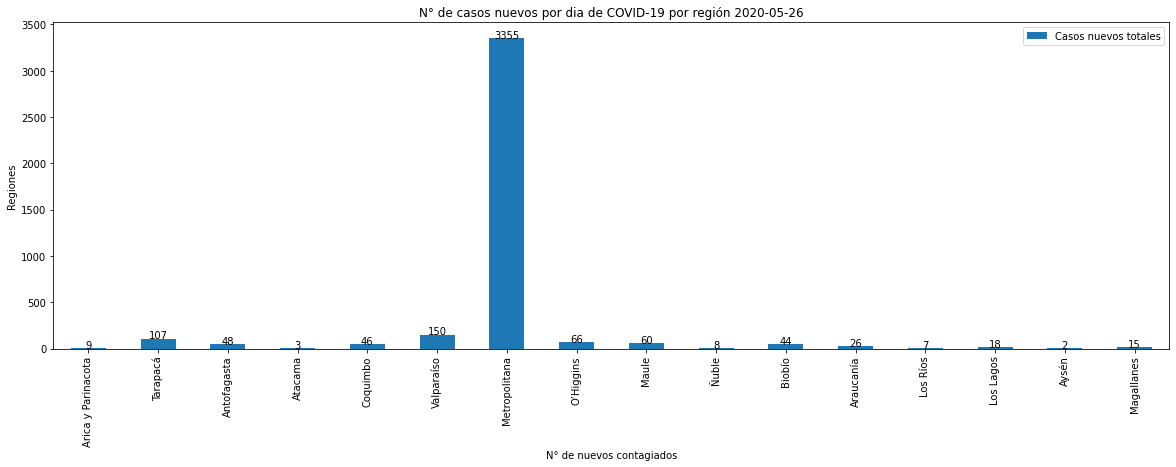

In [9]:
plt.rcParams['figure.figsize']=(20,6)
df.plot.bar('Región','Casos nuevos totales')
plt.title("N° de casos nuevos por dia de COVID-19 por región "+str(date.today()))
plt.xlabel('N° de nuevos contagiados')
plt.ylabel('Regiones')
for i, v in enumerate(df['Casos nuevos totales']):
  plt.annotate(v, xy=(i, v),horizontalalignment='center')
plt.show()

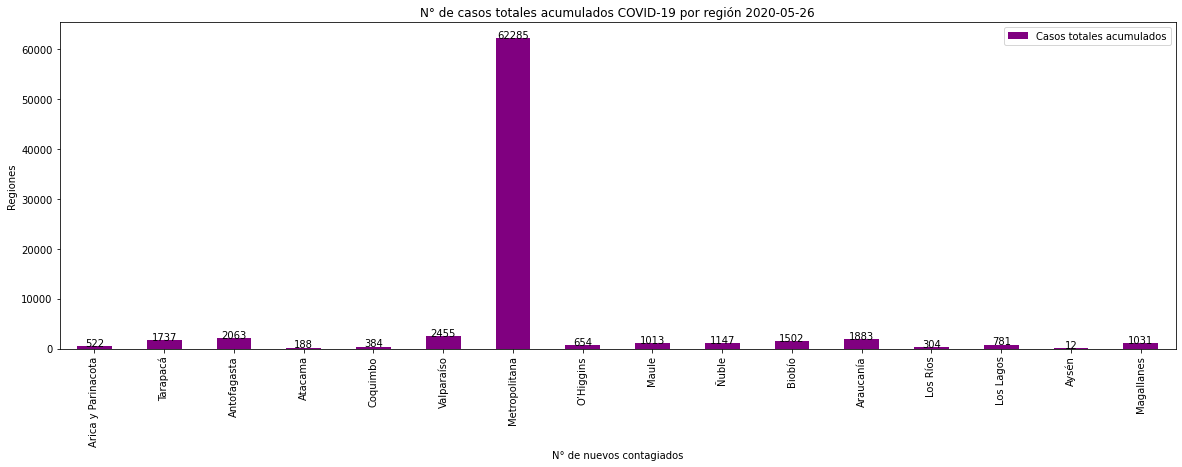

In [10]:
df.plot.bar('Región','Casos totales acumulados',color='purple')
plt.title("N° de casos totales acumulados COVID-19 por región "+str(date.today()))
plt.xlabel('N° de nuevos contagiados')
plt.ylabel('Regiones')
for i, v in enumerate(df['Casos totales acumulados']):
  plt.annotate(v, xy=(i, v),horizontalalignment='center')
plt.show()

In [11]:
import plotly.express as px
fig = px.pie(df, values='Casos nuevos totales', names='Región',
             title="N° de casos nuevos por dia de COVID-19 por región "+str(date.today()))
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Cargamos el archivo Geojson que contiene el mapa de chile.

In [0]:
import geopandas as gpd

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/COVID-19 Chile (Coronavirus)/Map')

map_data = gpd.read_file('Mapa_Chile_Regiones.geojson')
map_data.head()

mapa = map_data.iloc[:,1:2]

En este grafico se muestra la concentración de infectados por región.

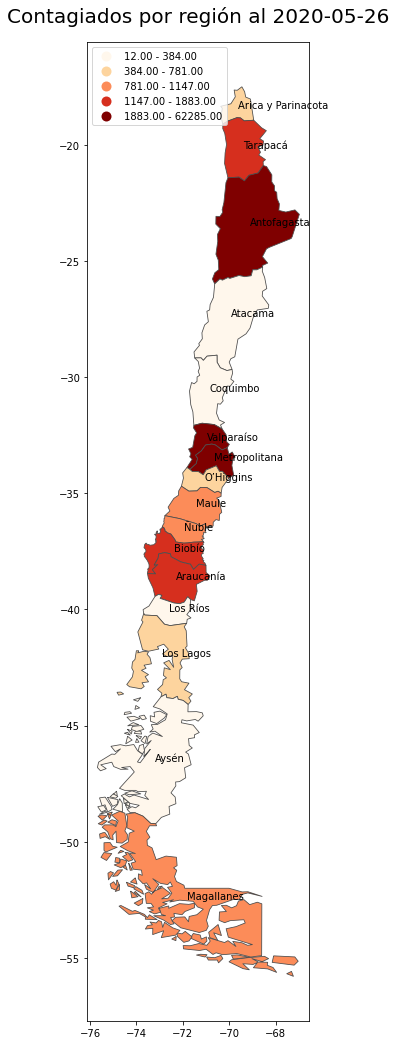

In [13]:
casosxregion = df.iloc[:16,1:2] #Casos totales acumulados

map_data = map_data.assign(casos = casosxregion)

fig = map_data.plot(column= 'casos', cmap='OrRd', figsize=(18,18), linewidth=0.8, scheme="Quantiles",edgecolor='0.3', legend=True,legend_kwds={'loc': 'upper left'})
fig.set_title('Contagiados por región al '+str(date.today()), pad = 20, fontdict={'fontsize':20, 'color': '#000000'})
for idx, row in map_data.iterrows():
    plt.annotate(s=row['Region'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='left', fontsize=10);

In [14]:
data_hab = {'regiones': ['Arica y Parinacota','Tarapacá','Antofagasta','Atacama','Coquimbo','Valparaíso','Metropolitana','O\'Higgins','Maule','Ñuble','Biobío','Araucanía','Los Ríos','Los Lagos','Aysén','Magallanes'],
       'Poblacion':[252110,382773,691854,314709,836096,1960170,8125072,991063,1131939,511551,1663696,1014343,405835,891440,107297,178362]}
n_region=pd.DataFrame(data_hab)
n_region

,regiones,Poblacion
0,Arica y Parinacota,252110
1,Tarapacá,382773
2,Antofagasta,691854
3,Atacama,314709
4,Coquimbo,836096
5,Valparaíso,1960170
6,Metropolitana,8125072
7,O'Higgins,991063
8,Maule,1131939
9,Ñuble,511551


**Taza de prevalencia COVID-19 en Chile**

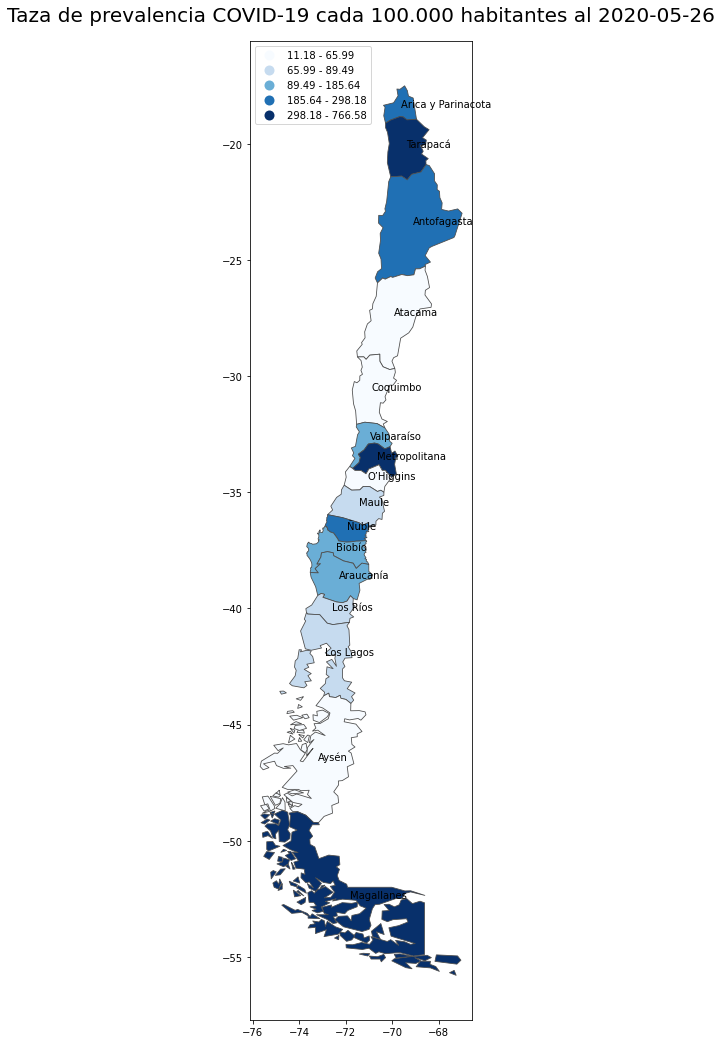

In [15]:
Prevalencia = (df['Casos totales acumulados']/n_region.Poblacion)*100000

fig = map_data.plot(column= Prevalencia, cmap='Blues', figsize=(18,18), linewidth=0.8, scheme="Quantiles",edgecolor='0.3', legend=True,legend_kwds={'loc': 'upper left'})
fig.set_title('Taza de prevalencia COVID-19 cada 100.000 habitantes al '+str(date.today()), pad = 20, fontdict={'fontsize':20, 'color': '#000000'})
for idx, row in map_data.iterrows():
    plt.annotate(s=row['Region'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='left', fontsize=10);

**Taza de incidencia COVID-19 en Chile**

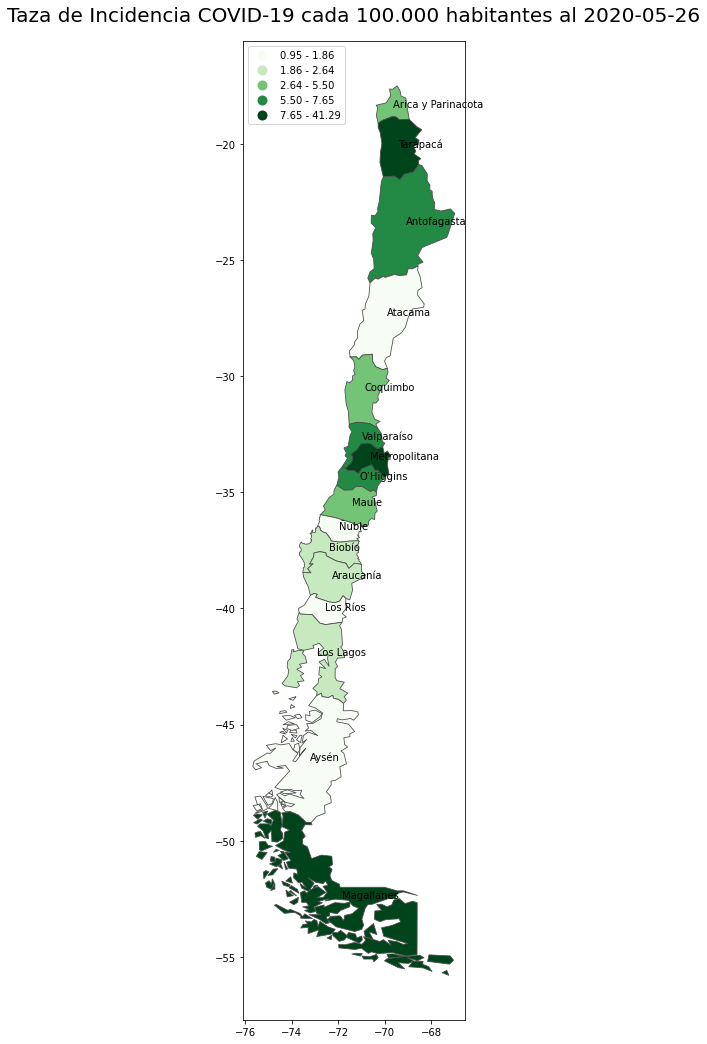

In [16]:
Prevalencia = (df['Casos nuevos totales'] / n_region.Poblacion )*100000

fig = map_data.plot(column= Prevalencia, cmap='Greens', figsize=(18,18), linewidth=0.8, scheme="Quantiles",edgecolor='0.3', legend=True,legend_kwds={'loc': 'upper left'})
fig.set_title('Taza de Incidencia COVID-19 cada 100.000 habitantes al '+str(date.today()), pad = 20, fontdict={'fontsize':20, 'color': '#000000'})
for idx, row in map_data.iterrows():
    plt.annotate(s=row['Region'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='left', fontsize=10);

En este se muestra los casos totales por número de día.

Lo que hacemos aquí es una regresión polinomial que se ajusta a los datos entregados por el minal para tener una idea visual de cómo se comportan.


In [17]:
dia_actual = len(fq) + 1
dias = np.arange(1,dia_actual)
X = dias.reshape(len(dias),1)
#y = fq.iloc[:,2:3]
y = fq.Casos_totales_nuevos

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_regression = PolynomialFeatures(degree=6)
X_poly_regression = poly_regression.fit_transform(X)

lin_regression_2 = LinearRegression()
lin_regression_2.fit(X_poly_regression,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Hacemos la exponencial.

In [0]:
from scipy.optimize import curve_fit

def exponential_model(t, a, b):
    return a*np.exp(-b*t)

ini = [1.0,1.0]
datax = list(dias)
datay = list(y)
popt,pcov = curve_fit(exponential_model, datax, datay,ini)
xfit = np.arange(1.0,float(dia_actual),0.1)

##Mostramos el grafico con los datos entregados por el minsal, la regresión polinomial y la exponencial.


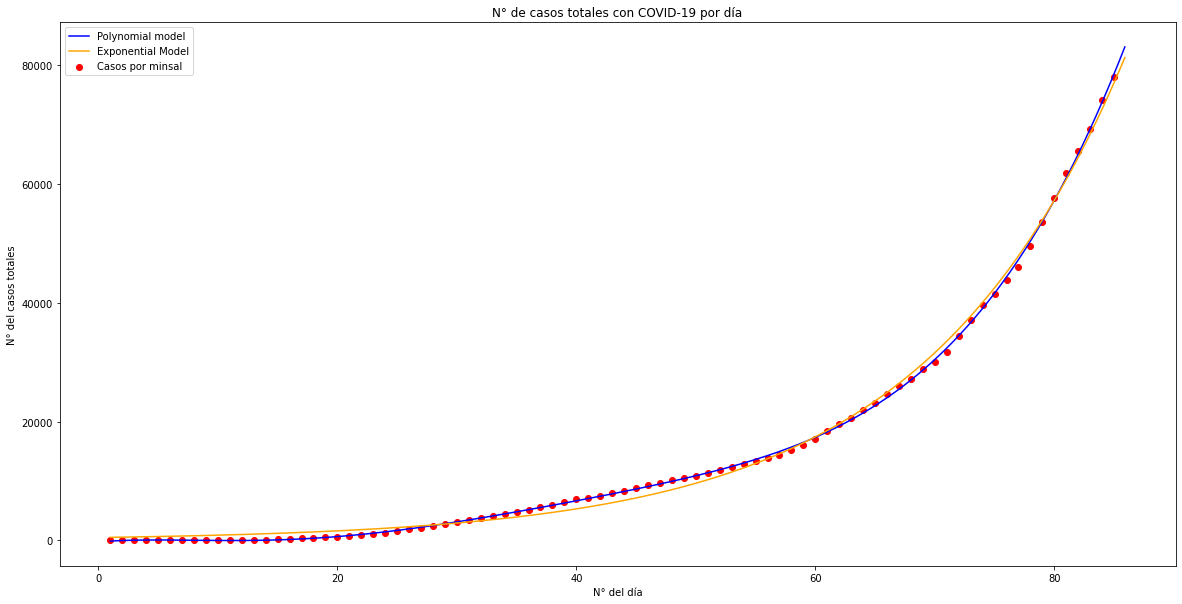

In [19]:
plt.rcParams['figure.figsize']=(20,10)

X_grid = np.arange(1,dia_actual,0.1)
X_grid = X_grid.reshape(len(X_grid),1)

plt.scatter(X,y,color='red',label='Casos por minsal')
plt.plot(X_grid,lin_regression_2.predict(poly_regression.fit_transform(X_grid)),color='blue',label='Polynomial model')
plt.plot(xfit,exponential_model(xfit,*popt),color='orange',label = 'Exponential Model')

plt.title('N° de casos totales con COVID-19 por día')
plt.xlabel('N° del día')
plt.ylabel('N° del casos totales')

plt.legend(loc = 'upper left')

plt.show()

Aquí hacemos una predicción para los próximos 2 días con la pendiente de la regresión polinomial.

In [20]:
for i in range(len(fq),len(fq)+3):
  prediccion = int(lin_regression_2.predict(poly_regression.fit_transform([[i]])))
  if i == len(fq):
    print('Hoy, dia '+str(i)+': '+str(prediccion)+' infectados aprox.')
  else:
    print('Dia '+str(i)+': '+str(prediccion)+' infectados aprox.')

Hoy, dia 85: 78458 infectados aprox.
Dia 86: 83489 infectados aprox.
Dia 87: 88801 infectados aprox.
